In [168]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
plt.style.use('seaborn-v0_8-whitegrid')
pd.options.plotting.backend = "matplotlib"
pasta_dados = r"C:\Users\Cinthya\Desktop\RA\dados_macro\\dados\\"
dados = pd.DataFrame()


In [169]:
pasta_dados = r"C:\Users\Cinthya\Desktop\RA\dados_macro\\dados\\"
caminho_IBRE_anual_produtividade_do_trabalho_agg = pasta_dados + "IBRE_anual_produtividade-do-trabalho_agg.xlsx"
IBRE_anual_produtividade_do_trabalho_agg = pd.read_excel(caminho_IBRE_anual_produtividade_do_trabalho_agg, sheet_name = 1, skiprows=7, index_col=0)
IBRE_anual_produtividade_do_trabalho_agg.index = pd.to_datetime(IBRE_anual_produtividade_do_trabalho_agg.index, format='%Y')
IBRE_anual_produtividade_do_trabalho_agg.rename(

    {
        'Produtividade por Horas Trabalhadas (Em R$ de 2021)': 'Produtividade por Horas Trabalhadas (Em R$ de 2021) (IBRE)',
        'Produtividade por População Ocupada (Em R$ de 2021)': 'Produtividade por População Ocupada (Em R$ de 2021) (IBRE)'
    }, inplace=True,axis=1
)
IBRE_anual_produtividade_do_trabalho_agg.head()


caminho_IBRE_anual_produtividade_total_dos_fatores_agg = pasta_dados + "IBRE_anual_produtividade-total-dos-fatores_agg.xlsx"
IBRE_anual_produtividade_total_dos_fatores_agg_sem_ajuste = pd.read_excel(caminho_IBRE_anual_produtividade_total_dos_fatores_agg, sheet_name = 1, skiprows=7, index_col=0)
IBRE_anual_produtividade_total_dos_fatores_agg_sem_ajuste.index = pd.to_datetime(IBRE_anual_produtividade_total_dos_fatores_agg_sem_ajuste.index, format='%Y')
IBRE_anual_produtividade_total_dos_fatores_agg_sem_ajuste.rename(

    {
        'PTF por Horas Trabalhadas (1981=100) sem ajuste de capital humano': 'PTF por Horas Trabalhadas (1981=100) sem ajuste de capital humano (IBRE)',
    }, inplace=True,axis=1
)
IBRE_anual_produtividade_total_dos_fatores_agg_sem_ajuste.head()

IBRE_anual_produtividade_total_dos_fatores_agg_com_ajuste = pd.read_excel(caminho_IBRE_anual_produtividade_total_dos_fatores_agg, sheet_name = 2, skiprows=7, index_col=0)
IBRE_anual_produtividade_total_dos_fatores_agg_com_ajuste.index = pd.to_datetime(IBRE_anual_produtividade_total_dos_fatores_agg_com_ajuste.index, format='%Y')
IBRE_anual_produtividade_total_dos_fatores_agg_com_ajuste.rename(

    {
        'PTF por Horas Trabalhadas (1995=100) com ajuste de capital humano': 'PTF por Horas Trabalhadas (1981=100) com ajuste de capital humano (IBRE)',
    }, inplace=True,axis=1
)



dados = pd.concat([dados, 
                   IBRE_anual_produtividade_do_trabalho_agg, 
                   IBRE_anual_produtividade_total_dos_fatores_agg_sem_ajuste, 
                   IBRE_anual_produtividade_total_dos_fatores_agg_com_ajuste], 
                   axis=1)
display(dados.head())




,Produtividade por Horas Trabalhadas (Em R$ de 2021) (IBRE),Produtividade por População Ocupada (Em R$ de 2021) (IBRE),PTF por Horas Trabalhadas (1981=100) sem ajuste de capital humano (IBRE),PTF por Horas Trabalhadas (1981=100) com ajuste de capital humano (IBRE)
Anos,,,,
1981-01-01,33.203424,75234.943769,100.000000,NaN
1982-01-01,31.883301,72301.125749,96.639136,NaN
1983-01-01,30.272237,68127.436927,92.509756,NaN
1984-01-01,30.426394,68611.242471,93.138750,NaN
1985-01-01,30.781192,69341.002937,94.018750,NaN


In [170]:
import sidrapy
from bcb import sgs
import pandas as pd

# --- FUNÇÃO DE LIMPEZA BLINDADA ---
def limpar_numero_ibge(serie):
    # 1. Converte para string e remove espaços
    s = serie.astype(str).str.strip()
    # 2. Se for "..", vira NaN imediatamente
    s = s.replace('..', float('nan'))
    # 3. Remove ponto de milhar
    s = s.str.replace('.', '', regex=False)
    # 4. Troca vírgula por ponto
    s = s.str.replace(',', '.', regex=False)
    # 5. Converte para número
    return pd.to_numeric(s, errors='coerce')

# ==============================================================================
# 1. JURO REAL (Fonte: Banco Central)
# ==============================================================================
print(">>> [1/2] Baixando Juros e Inflação (BCB)...")
df_bcb = sgs.get({'Selic': 4189, 'IPCA': 13522}, start='1996-01-01')

# Cálculo do Juro Real Ex-post
df_bcb['Juro Real (a.a.)'] = (((1 + df_bcb['Selic']/100) / (1 + df_bcb['IPCA']/100)) - 1) * 100

# Anualizando
juro_real_anual = df_bcb[['Juro Real (a.a.)']].resample('YE').mean()
juro_real_anual.index = pd.to_datetime(juro_real_anual.index.year, format='%Y')


# ==============================================================================
# 2. DADOS DO IBGE (Tabela 1846 - Variável 585)
# ATUALIZADO: Incluindo Consumo do Governo
# ==============================================================================
print(">>> [2/2] Baixando Contas Nacionais (IBGE Tabela 1846)...")

dados_ibge = sidrapy.get_table(
    table_code="1846", 
    territorial_level="1", 
    ibge_territorial_code="1", 
    variable="585", 
    classifications={"11255": "all"}, 
    period="all"
)

# --- LIMPEZA ---
ibge_clean = dados_ibge.iloc[1:].copy()
ibge_clean.columns = dados_ibge.iloc[0]
ibge_clean['Valor'] = limpar_numero_ibge(ibge_clean['Valor'])

ibge_clean['Date'] = pd.to_datetime(
    ibge_clean['Trimestre (Código)'].str[:4] + '-' + 
    (pd.to_numeric(ibge_clean['Trimestre (Código)'].str[-1:]) * 3 - 2).astype(str) + '-01'
)

df_contas = ibge_clean.pivot_table(index='Date', columns='Setores e subsetores', values='Valor')
cols = df_contas.columns.tolist()

try:
    # Identificando as colunas
    col_pib  = [c for c in cols if 'PIB' in c or 'Produto interno' in c][0]
    col_fbcf = [c for c in cols if 'Formação bruta de capital fixo' in c][0]
    col_exp  = [c for c in cols if 'xporta' in c][0]
    col_imp  = [c for c in cols if 'mporta' in c][0]
    
    # NOVO: Buscando Consumo do Governo
    # Geralmente vem como "Despesa de consumo da administração pública"
    col_gov  = [c for c in cols if 'administração pública' in c or 'administracao publica' in c][0]

    print(f"Colunas:\n- PIB: {col_pib}\n- Inv: {col_fbcf}\n- Gov: {col_gov}")

    # --- CÁLCULOS ---
    # 1. Taxa de Investimento
    df_contas['Taxa de Investimento (% PIB) (IBGE)'] = (df_contas[col_fbcf] / df_contas[col_pib]) * 100
    
    # 2. Abertura Comercial
    df_contas['Abertura Comercial (% PIB) (IBGE)'] = ((df_contas[col_exp] + df_contas[col_imp]) / df_contas[col_pib]) * 100
    
    # 3. NOVO: Consumo do Governo
    df_contas['Consumo do Governo (% PIB) (IBGE)'] = (df_contas[col_gov] / df_contas[col_pib]) * 100

except IndexError as e:
    print("ERRO: Coluna não encontrada. Verifique:", cols)
    raise e

# Anualizando
df_final_ibge = df_contas[[
    'Taxa de Investimento (% PIB) (IBGE)', 
    'Abertura Comercial (% PIB) (IBGE)',
    'Consumo do Governo (% PIB) (IBGE)' # Adicionando a nova coluna
]]
df_final_ibge = df_final_ibge.resample('YE').mean()
df_final_ibge.index = pd.to_datetime(df_final_ibge.index.year, format='%Y')
# ==============================================================================
# 3. JUNTANDO TUDO AO SEU DATAFRAME ORIGINAL
# ==============================================================================
print(">>> Consolidando dados...")

# Se 'dados' já existir no seu ambiente, isso adiciona as colunas novas
# Se estiver rodando do zero e 'dados' não existir, descomente a linha abaixo:
# dados = pd.DataFrame() 

dados = pd.concat([dados, juro_real_anual, df_final_ibge], axis=1)

print("Sucesso! Veja as últimas linhas:")
display(dados.tail())

>>> [1/2] Baixando Juros e Inflação (BCB)...
>>> [2/2] Baixando Contas Nacionais (IBGE Tabela 1846)...
Colunas:
- PIB: PIB a preços de mercado
- Inv: Formação bruta de capital fixo
- Gov: Despesa de consumo da administração pública
>>> Consolidando dados...
Sucesso! Veja as últimas linhas:


,Produtividade por Horas Trabalhadas (Em R$ de 2021) (IBRE),Produtividade por População Ocupada (Em R$ de 2021) (IBRE),PTF por Horas Trabalhadas (1981=100) sem ajuste de capital humano (IBRE),PTF por Horas Trabalhadas (1981=100) com ajuste de capital humano (IBRE),Juro Real (a.a.),Taxa de Investimento (% PIB) (IBGE),Abertura Comercial (% PIB) (IBGE),Consumo do Governo (% PIB) (IBGE)
2021-01-01,43.254164,86062.488030,112.079176,81.449738,-3.568274,17.921600,37.631221,18.505454
2022-01-01,41.359859,82668.132026,109.032974,79.225038,2.888870,17.792938,38.798417,18.342264
2023-01-01,42.323297,84352.289216,111.435338,80.061565,8.226357,16.425435,33.701395,18.978695
2024-01-01,42.376038,84567.325289,111.157571,79.448572,6.201439,17.023478,35.453870,18.764432
2025-01-01,NaN,NaN,NaN,NaN,8.605776,17.271005,36.102941,17.755522


In [171]:
dados.head(20)

,Produtividade por Horas Trabalhadas (Em R$ de 2021) (IBRE),Produtividade por População Ocupada (Em R$ de 2021) (IBRE),PTF por Horas Trabalhadas (1981=100) sem ajuste de capital humano (IBRE),PTF por Horas Trabalhadas (1981=100) com ajuste de capital humano (IBRE),Juro Real (a.a.),Taxa de Investimento (% PIB) (IBGE),Abertura Comercial (% PIB) (IBGE),Consumo do Governo (% PIB) (IBGE)
1981-01-01,33.203424,75234.943769,100.000000,NaN,NaN,NaN,NaN,NaN
1982-01-01,31.883301,72301.125749,96.639136,NaN,NaN,NaN,NaN,NaN
1983-01-01,30.272237,68127.436927,92.509756,NaN,NaN,NaN,NaN,NaN
1984-01-01,30.426394,68611.242471,93.138750,NaN,NaN,NaN,NaN,NaN
1985-01-01,30.781192,69341.002937,94.018750,NaN,NaN,NaN,NaN,NaN
1986-01-01,32.039290,71548.494778,95.876832,NaN,NaN,NaN,NaN,NaN
1987-01-01,32.325904,71991.554739,96.973797,NaN,NaN,NaN,NaN,NaN
1988-01-01,31.692265,70262.069064,95.333322,NaN,NaN,NaN,NaN,NaN
1989-01-01,32.622235,70743.256177,96.432860,NaN,NaN,NaN,NaN,NaN
1990-01-01,31.650275,68551.353091,94.057753,NaN,NaN,NaN,NaN,NaN


In [173]:
dados_index = dados.copy()
colunas_alvo = [0, 1]
dados_index.iloc[:, colunas_alvo] = (dados_index.iloc[:, colunas_alvo] / dados_index.iloc[0, colunas_alvo]) * 100
dados_index.rename(
    {
        'Produtividade por População Ocupada (Em R$ de 2021) (IBRE)': 'Produtividade por População Ocupada (1981=100) (IBRE)',
        'Produtividade por Horas Trabalhadas (Em R$ de 2021) (IBRE)': 'Produtividade por Horas Trabalhadas (1981=100) (IBRE)'
    }, inplace=True,axis=1
)

start_SBS = 1996
start_IBGE = 1996
colunas_alvo = [4,5,6,7]
dados_index.iloc[:, colunas_alvo] = (dados_index.iloc[:, colunas_alvo] / dados_index.loc['1996-01-01'].iloc[colunas_alvo]) * 100
dados_index.rename(
    {
        'Juro Real (a.a.)': f'Juro Real (a.a.) ({start_SBS}=100) (SGS)',
        'Taxa de Investimento (% PIB) (IBGE)': f'Taxa de Investimento (% PIB) ({start_IBGE}=100) (IBGE)',
        'Abertura Comercial (% PIB) (IBGE)': f'Abertura Comercial (% PIB) ({start_IBGE}=100) (IBGE)',
        'Consumo do Governo (% PIB) (IBGE)': f'Consumo do Governo (% PIB) ({start_IBGE}=100)(IBGE)'
    }, inplace=True,axis=1
)

display(dados_index.head(20))

,Produtividade por Horas Trabalhadas (1981=100) (IBRE),Produtividade por População Ocupada (1981=100) (IBRE),PTF por Horas Trabalhadas (1981=100) sem ajuste de capital humano (IBRE),PTF por Horas Trabalhadas (1981=100) com ajuste de capital humano (IBRE),Juro Real (a.a.) (1996=100) (SGS),Taxa de Investimento (% PIB) (1996=100) (IBGE),Abertura Comercial (% PIB) (1996=100) (IBGE),Consumo do Governo (% PIB) (1996=100)(IBGE)
1981-01-01,100.000000,100.000000,100.000000,NaN,NaN,NaN,NaN,NaN
1982-01-01,96.024135,96.100458,96.639136,NaN,NaN,NaN,NaN,NaN
1983-01-01,91.172034,90.552918,92.509756,NaN,NaN,NaN,NaN,NaN
1984-01-01,91.636313,91.195978,93.138750,NaN,NaN,NaN,NaN,NaN
1985-01-01,92.704871,92.165953,94.018750,NaN,NaN,NaN,NaN,NaN
1986-01-01,96.493933,95.100084,95.876832,NaN,NaN,NaN,NaN,NaN
1987-01-01,97.357139,95.688986,96.973797,NaN,NaN,NaN,NaN,NaN
1988-01-01,95.448784,93.390206,95.333322,NaN,NaN,NaN,NaN,NaN
1989-01-01,98.249610,94.029785,96.432860,NaN,NaN,NaN,NaN,NaN
1990-01-01,95.322322,91.116374,94.057753,NaN,NaN,NaN,NaN,NaN


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >], dtype=object)

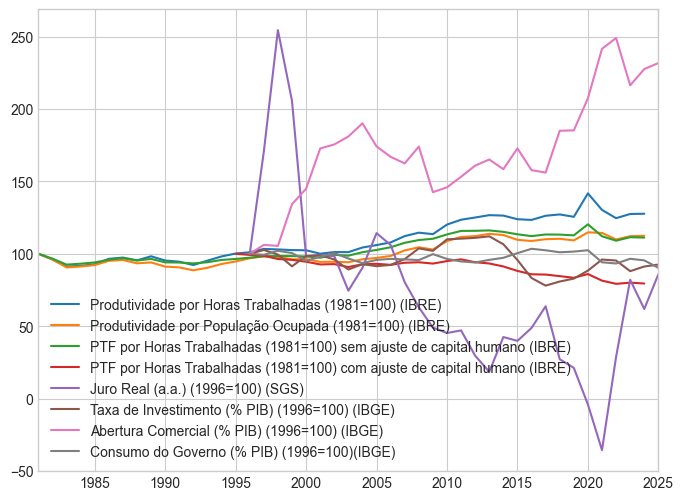

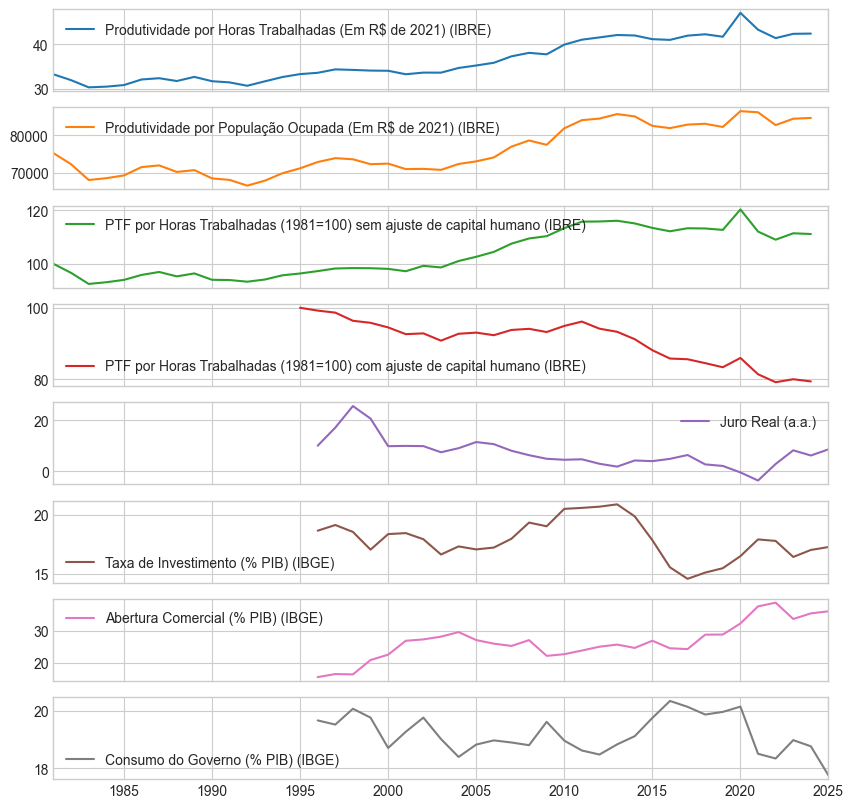

In [174]:
dados_index.plot(figsize = (8,6))
dados.plot(subplots=True,figsize=(10,10))

In [ ]:
print(">>> Baixando Custo Laboral Unitário (CLU)...")
df_clu = sgs.get({'CLU Real (Indústria)': 11777, 'CLU Dólar (Indústria)': 11778}, start='1996-01-01')
ValueError: Expected object or value

# Anualizando (Média)
clu_anual = df_clu.resample('YE').mean()
clu_anual.index = pd.to_datetime(clu_anual.index.year, format='%Y')

# Juntando ao dataframe principal
dados = pd.concat([dados, clu_anual], axis=1)

print("Novas colunas adicionadas:")
display(dados[['CLU Real (Indústria)', 'CLU Dólar (Indústria)']].tail())

>>> Baixando Custo Laboral Unitário (CLU)...


ValueError: Expected object or value

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >], dtype=object)

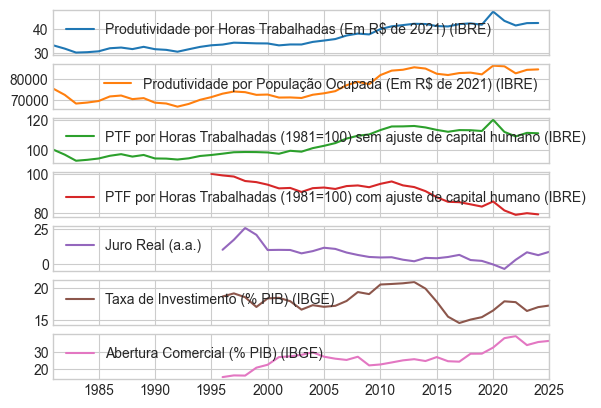

In [131]:
dados.plot(subplots=True)